In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-2.592856131787414 -52.13581187446816
3.249723327324716 -132.92002299793228
79.5365394903871 29.504987939509846
-36.71486952226041 95.24058769004796
-24.085900057989207 21.579311052981808
-81.2559463832636 -171.62638173425972
61.14583963907009 -170.98035555660095
42.27662681768277 -136.35266583282615
-76.46184544326205 44.13293066516232
-57.98505708737098 33.86727138048636
-45.86088522433445 -7.579596457969615
-27.550076641401795 -2.487577774437966
21.08886690241755 12.801932550928
81.5652130538569 -145.86882296837618
-78.25806221553252 -60.495598241139064
66.24395593762546 90.74643989208084
-6.623011639134262 -68.33337327706371
-58.956643449718825 23.97873104726017
-62.52174607393097 95.40904156002125
-41.499689881441 -114.12197961030058
5.600226611619604 -45.404628961204736
43.54544528249599 59.764370421356176
-42.23571783082769 -22.32360841137873
-32.23346324758846 -2.1305123639671706
-69.12696510955118 51.85004809699453
-9.595462642592452 -25.224817884417263
-22.20585929188387 49.9

In [5]:
# Import citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Impor the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1757759d198b4d5c0800796a2ddcb77


In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters.
record_count = 1 
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | senador jose porfirio
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | mehamn
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | hukuntsi
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | north bend
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bilma
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | svetlogorsk
Processing Record 16 of Set 1 | eirunepe
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | amapa
Processing Record 20 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | east london
Process

Processing Record 39 of Set 4 | rawlins
Processing Record 40 of Set 4 | dvinskoy
Processing Record 41 of Set 4 | siyabuswa
Processing Record 42 of Set 4 | nhulunbuy
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | vila
Processing Record 45 of Set 4 | cape town
Processing Record 46 of Set 4 | alta floresta
Processing Record 47 of Set 4 | palora
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | akyab
Processing Record 50 of Set 4 | guicheng
City not found. Skipping...
Processing Record 1 of Set 5 | ponta delgada
Processing Record 2 of Set 5 | dickinson
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | haapu
City not found. Skipping...
Processing Record 7 of Set 5 | half moon bay
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | ahuimanu
Processing Record 10 of Set 5 | san cristobal
Processing Record 11 of Set 5 | hasaki

Processing Record 27 of Set 8 | lae
Processing Record 28 of Set 8 | kudat
Processing Record 29 of Set 8 | destin
Processing Record 30 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | mongo
Processing Record 33 of Set 8 | victoria
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | aqtobe
Processing Record 36 of Set 8 | manta
Processing Record 37 of Set 8 | tezu
Processing Record 38 of Set 8 | pochutla
Processing Record 39 of Set 8 | pangody
Processing Record 40 of Set 8 | oktyabrskoye
Processing Record 41 of Set 8 | kingston
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | luanda
Processing Record 44 of Set 8 | malakal
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | sambava
Processing Record 47 of Set 8 | pingzhuang
Processing Record 48 of Set 8 | sao gabriel da cachoeira
Processing Record 49 of Set 8 | tondano
Processing Record 50 of S

Processing Record 14 of Set 12 | syracuse
Processing Record 15 of Set 12 | ambah
Processing Record 16 of Set 12 | siniscola
Processing Record 17 of Set 12 | canakkale
Processing Record 18 of Set 12 | kijang
Processing Record 19 of Set 12 | rudnogorsk
Processing Record 20 of Set 12 | vao
Processing Record 21 of Set 12 | nayoro
Processing Record 22 of Set 12 | elko
Processing Record 23 of Set 12 | pozo colorado
Processing Record 24 of Set 12 | ossora
Processing Record 25 of Set 12 | panaba
Processing Record 26 of Set 12 | aktau
Processing Record 27 of Set 12 | san miguel de cauri
Processing Record 28 of Set 12 | shangqiu
Processing Record 29 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 30 of Set 12 | harwich
Processing Record 31 of Set 12 | sassandra
Processing Record 32 of Set 12 | wagar
Processing Record 33 of Set 12 | nattam
Processing Record 34 of Set 12 | colares
Processing Record 35 of Set 12 | port-gentil
Processing Record 36 of Set 12 | vila franca do cam

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Senador Jose Porfirio,-2.5908,-51.9542,75.38,93,99,3.00,BR,2023-01-17 22:00:57
1,Atuona,-9.8000,-139.0333,78.30,77,26,17.92,PF,2023-01-17 22:00:57
2,Mehamn,71.0357,27.8492,33.75,80,0,24.16,NO,2023-01-17 22:00:58
3,Busselton,-33.6500,115.3333,55.27,65,51,13.80,AU,2023-01-17 22:00:58
4,Hukuntsi,-24.0000,21.7500,82.92,27,48,11.99,BW,2023-01-17 22:00:58
5,Vaini,-21.2000,-175.2000,80.51,80,19,8.03,TO,2023-01-17 22:00:59
6,Provideniya,64.3833,-173.3000,-9.29,59,0,11.18,RU,2023-01-17 22:00:59
7,North Bend,43.4065,-124.2243,50.23,97,96,8.43,US,2023-01-17 22:00:04
8,Port Alfred,-33.5906,26.8910,76.17,96,96,4.03,ZA,2023-01-17 22:01:00
9,Saldanha,-33.0117,17.9442,64.40,94,72,11.05,ZA,2023-01-17 22:01:00


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Senador Jose Porfirio,BR,2023-01-17 22:00:57,-2.5908,-51.9542,75.38,93,99,3.00
1,Atuona,PF,2023-01-17 22:00:57,-9.8000,-139.0333,78.30,77,26,17.92
2,Mehamn,NO,2023-01-17 22:00:58,71.0357,27.8492,33.75,80,0,24.16
3,Busselton,AU,2023-01-17 22:00:58,-33.6500,115.3333,55.27,65,51,13.80
4,Hukuntsi,BW,2023-01-17 22:00:58,-24.0000,21.7500,82.92,27,48,11.99
5,Vaini,TO,2023-01-17 22:00:59,-21.2000,-175.2000,80.51,80,19,8.03
6,Provideniya,RU,2023-01-17 22:00:59,64.3833,-173.3000,-9.29,59,0,11.18
7,North Bend,US,2023-01-17 22:00:04,43.4065,-124.2243,50.23,97,96,8.43
8,Port Alfred,ZA,2023-01-17 22:01:00,-33.5906,26.8910,76.17,96,96,4.03
9,Saldanha,ZA,2023-01-17 22:01:00,-33.0117,17.9442,64.40,94,72,11.05


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

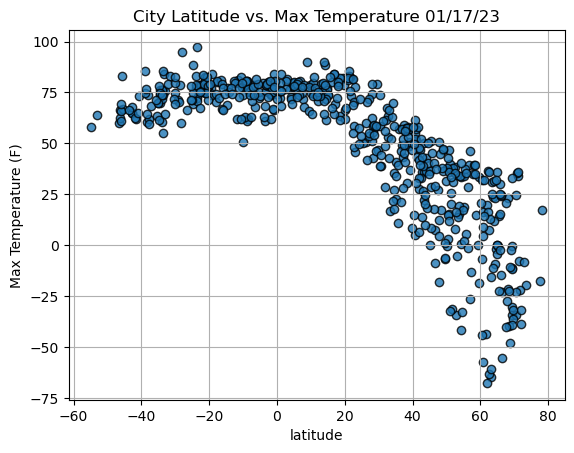

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

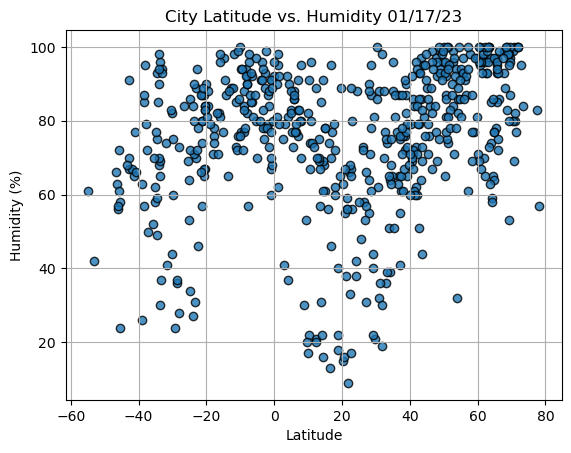

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

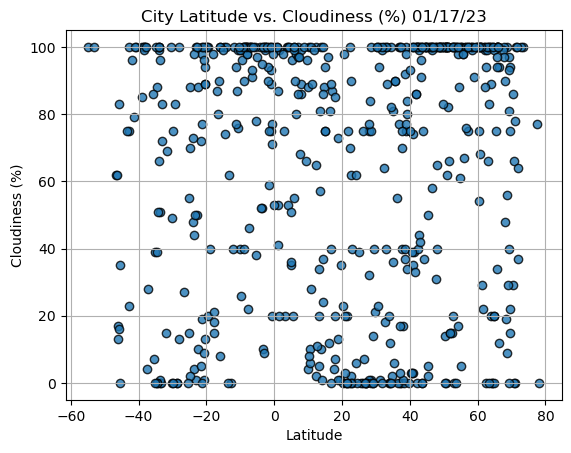

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

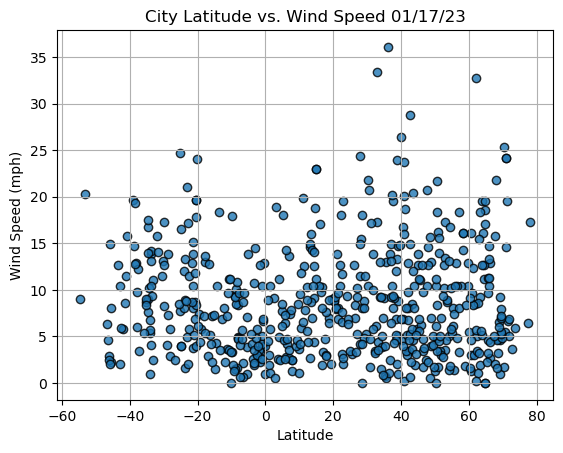

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                    57.87
Humidity                       61
Cloudiness                    100
Wind Speed                   9.04
Country                        AR
Date          2023-01-17 22:01:02
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
566     True
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Mehamn,71.0357,27.8492,33.75,80,0,24.16,NO,2023-01-17 22:00:58
6,Provideniya,64.3833,-173.3000,-9.29,59,0,11.18,RU,2023-01-17 22:00:59
7,North Bend,43.4065,-124.2243,50.23,97,96,8.43,US,2023-01-17 22:00:04
10,Jamestown,42.0970,-79.2353,46.94,60,100,8.05,US,2023-01-17 21:58:11
11,Bilma,18.6853,12.9164,63.21,22,13,6.96,NE,2023-01-17 22:01:01
...,...,...,...,...,...,...,...,...,...
566,Matara,5.9485,80.5353,72.54,87,100,7.34,LK,2023-01-17 22:16:32
567,Awjilah,29.1081,21.2869,58.42,40,0,8.01,LY,2023-01-17 22:16:33
568,Port Blair,11.6667,92.7500,73.36,73,99,7.87,IN,2023-01-17 22:15:10
569,Daultala,33.1925,73.1413,42.62,39,89,3.58,PK,2023-01-17 22:16:33


In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Mehamn,71.0357,27.8492,33.75,80,0,24.16,NO,2023-01-17 22:00:58
6,Provideniya,64.3833,-173.3000,-9.29,59,0,11.18,RU,2023-01-17 22:00:59
7,North Bend,43.4065,-124.2243,50.23,97,96,8.43,US,2023-01-17 22:00:04
10,Jamestown,42.0970,-79.2353,46.94,60,100,8.05,US,2023-01-17 21:58:11
11,Bilma,18.6853,12.9164,63.21,22,13,6.96,NE,2023-01-17 22:01:01


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

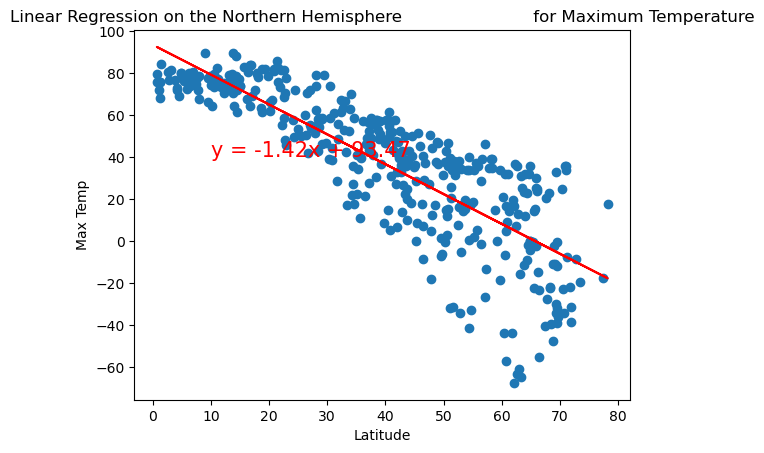

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature','Max Temp',(10,40))


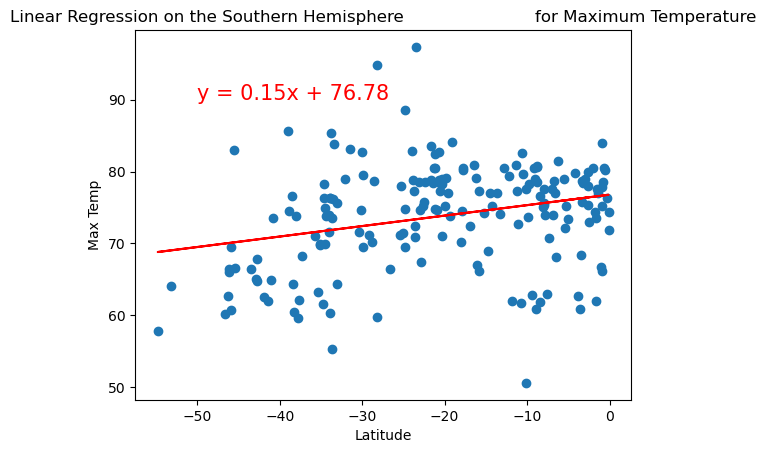

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

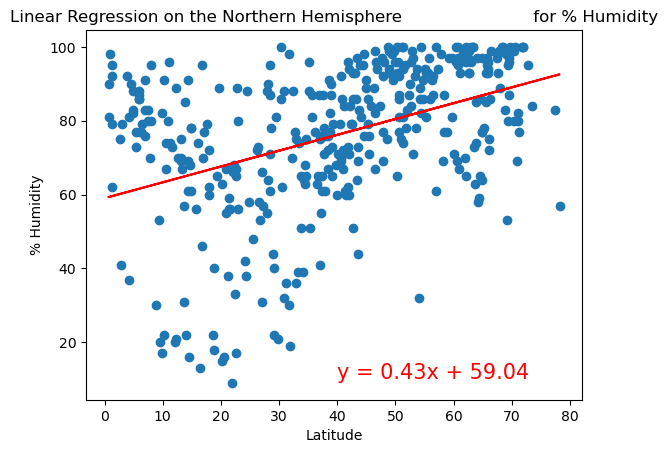

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

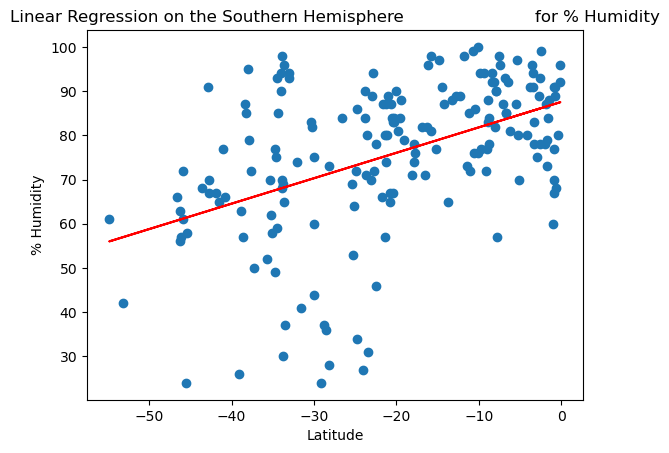

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

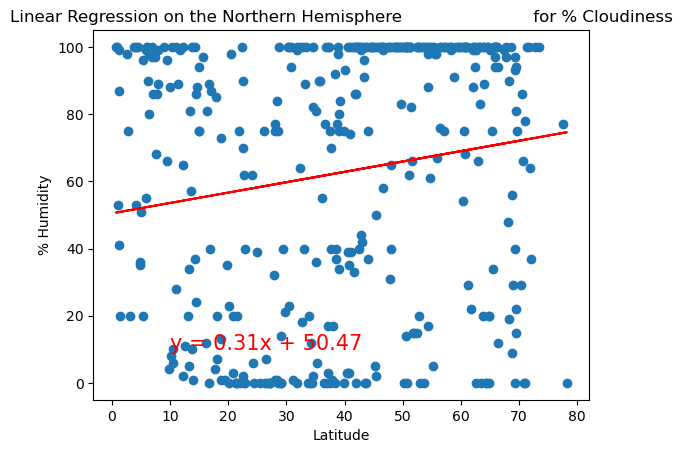

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(10, 10))

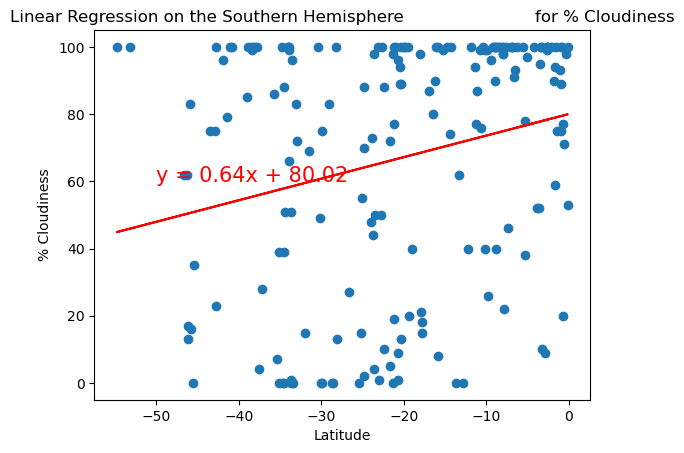

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

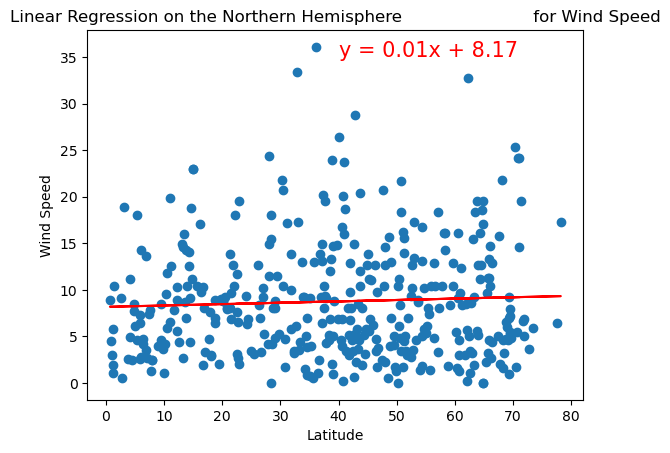

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

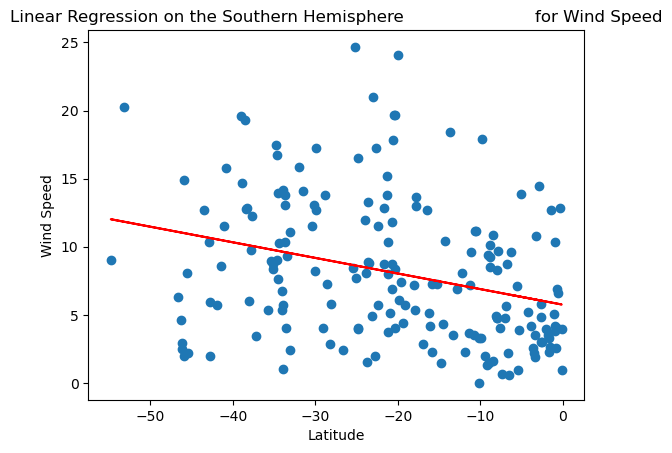

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))